In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
df = pd.read_csv('../Data/Use_Data/BERT_Classification_Data.csv')
df.head()

,출원번호,출원일자,발명의명칭(국문),preprocess_abstract,청구항,cpc코드,ipc코드
0,1019780001915,19780623,용성인비의조립방법,조미료 제조시에 부산물로 얻어지는 발효 폐액과 인산암모니움염의 혼합 현탁액을 이용하...,['분말 용성인비를 조립함에 있어 분말 용성인비 80-95부에 조미료 폐액에 인산 ...,C05B,C05B
1,1019780003870,19781221,2'4'-디플루오로ㅡ4-히드록시ㅡ3-비페닐카복시산의제조방법,"2',4'-디플루오로-4-아세톡시비페닐을 출발물질로하여 2',4'-디플루오로-4-히...","[""구조식 ( I )로 표시되는 2',4'-디플루오로-4-아세톡시비페닐을 사염화에탄...",C07C,C07C
2,1019790001504,19790511,음향재생시스템장치,최소의 잔향과 왜곡 현상을 나타내면서 넓은 가청 주파수 영역에서 평탄하고 균일한 특...,"['외벽, 혼, 스피커 원추, 저음스피커, 고음스피커로 이루어지는 음향재생장치로서,...",H04R,H04R
3,1019790002604,19790731,비오염화장실시스템,"[청구범위]도면에 도시하고 본문에 상술한 바와 같이, 보울, 일정하게 유수 보...","['도면에 도시하고 본문에 상술한 바와 같이, 보울, 일정하게 유수를 보울로 공급하...",E03D,E03D
4,1019790003025,19790904,치환된W-아로일(프로피오닐또는부티릴)-L-프로린유도체의제조방법,[목적] 안지오텐신 전환효소를 저해함으로써 안지오텐신 I이 안지오텐신 II로의 전환...,"[""구조식(Ⅱ)의 화합물과 구조식 H-R3인 티올화제의 음이온을 반응시켜 구조식(Ⅲ...",C07D,C07D


In [3]:
df['YEAR'] = df['출원일자'].apply(lambda x : int(str(x)[:4]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592002 entries, 0 to 3592001
Data columns (total 8 columns):
출원번호                   int64
출원일자                   int64
발명의명칭(국문)              object
preprocess_abstract    object
청구항                    object
cpc코드                  object
ipc코드                  object
YEAR                   int64
dtypes: int64(3), object(5)
memory usage: 219.2+ MB


In [4]:
new_df = df[df['YEAR'] >= 2015]
new_df.head()

,출원번호,출원일자,발명의명칭(국문),preprocess_abstract,청구항,cpc코드,ipc코드,YEAR
2012429,1020150000001,20150101,소금 마스크,"본 발명은 소금 마스크에 관한 것으로, 더욱 상세하게는 마스크에 소금을 구비하여 외...","['호흡기를 가리는 본체(10)에 소금(30)을 구비한 소금 마스크에 있어서,상기 ...",A62B,A62B,2015
2012430,1020150000004,20150101,접이식 침대 등받이,"본 발명은 변형 기능을 가진 침대 등받이에 관한 것으로, 더욱 상세 하게는 등받이에...",['위치를 자유롭게 이동시키고 등받이의 모양을 자유롭게 변형시켜 편하게 해주는 침대...,A47C,A47C,2015
2012431,1020150000007,20150101,무촉매 기판 성장 그래핀의 제조방법 및 무촉매 기판 성장 그래핀,"본 발명은, a. 기판에 무촉매층 구비 그 이후, b. 에칭 가스 및 탄소-포함 가...","['a. 기판에 무촉매층 구비 그 이후, b. 에칭 가스 및 탄소-포함 가스를 공급...",C01B,C01B,2015
2012432,1020150000008,20150101,가스보일러 안전기능형 배기통,"본 발명의 가스보일러 안전기능형 배기통은, 가스보일러 배기통과 가스보일러 접속부 및...",['가스를 연료로 사용하는 보일러와; 가스보일러 배기통과 상기 가스보일러...,F23J,F23J,2015
2012433,1020150000011,20150101,에너지 재활용 자동차 발전시스템,본 발명은 자동차가 주행 중일 때 회전운동에너지가 전기에너지로 변환되지 못하고 손실...,"['에너지 재활용 자동차 발전시스템(1)에 있어서, 자동차가 주행중일 때 발전장치(...",B60L,B60L,2015


In [5]:
search_list = set(['Y10S', 'Y10S', 'Y02E', 'F28D', 'B60S', 'B60L', 'G08C', 'F24D', 'B32B', 'H01L', 'H01L', 'G16Y', 'H01G'])
new_df['is_use'] = new_df['cpc코드'].apply(lambda x: 1 if x in search_list else 0)
u_new_df = new_df[new_df['is_use'] == 1]
u_new_df.head()

,출원번호,출원일자,발명의명칭(국문),preprocess_abstract,청구항,cpc코드,ipc코드,YEAR,is_use
2012433,1020150000011,20150101,에너지 재활용 자동차 발전시스템,본 발명은 자동차가 주행 중일 때 회전운동에너지가 전기에너지로 변환되지 못하고 손실...,"['에너지 재활용 자동차 발전시스템(1)에 있어서, 자동차가 주행중일 때 발전장치(...",B60L,B60L,2015,1
2012441,1020150000023,20150102,차량용 가죽시트 커버,본 발명은 탄성 부재 및 가죽 원단이 접착제층에 의해 결합된 적층 구조를 가지는 차...,"['탄성 부재 및 가죽 원단이 접착제층에 의해 결합된 적층 구조를 가지고,상기 탄성...",B32B,B32B,2015,1
2012444,1020150000026,20150102,렌즈 삽입부 내에 접합 홈을 구비하는 칩 기판,"본 발명은 칩 기판에 관한 것으로, 본 발명에 따른 칩 기판은수평 방향으로 적층되어...",['수평 방향으로 적층되어 칩 기판을 구성하는 복수의 전도층;상기 전도층과 교호로 ...,H01L,H01L,2015,1
2012472,1020150000064,20150102,습식 및 건식 식각공정을 이용한 압저항형 압력센서 제조방법,본 발명은 압저항형 압력센서(piezoresistive pressure sensor...,"['압저항형 압력센서 제조방법에 있어서, SOI 웨이퍼(wafer)를 준비하는 단계...",H01L,H01L,2015,1
2012473,1020150000065,20150102,반도체 패키지,"본 발명의 실시예에 따른 반도체 패키지는 반도체 칩, 상기 반도체 칩의 일측에 배치...",['반도체 칩;상기 반도체 칩의 일측에 배치된 연결장치;상기 반도체 칩의 하부면 및...,H01L,H01L,2015,1


In [6]:
u_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64320 entries, 2012433 to 3591989
Data columns (total 9 columns):
출원번호                   64320 non-null int64
출원일자                   64320 non-null int64
발명의명칭(국문)              64320 non-null object
preprocess_abstract    64320 non-null object
청구항                    64320 non-null object
cpc코드                  64320 non-null object
ipc코드                  64320 non-null object
YEAR                   64320 non-null int64
is_use                 64320 non-null int64
dtypes: int64(4), object(5)
memory usage: 4.9+ MB


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963138 entries, 2012429 to 3592001
Data columns (total 9 columns):
출원번호                   963138 non-null int64
출원일자                   963138 non-null int64
발명의명칭(국문)              963138 non-null object
preprocess_abstract    963138 non-null object
청구항                    963138 non-null object
cpc코드                  963138 non-null object
ipc코드                  963138 non-null object
YEAR                   963138 non-null int64
is_use                 963138 non-null int64
dtypes: int64(4), object(5)
memory usage: 73.5+ MB


In [8]:
u_new_df['cpc코드'].value_counts()

H01L    49118
B32B     6629
B60L     3541
H01G     2200
F24D      919
F28D      834
B60S      750
G08C      329
Name: cpc코드, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(8)
# years = ['2018', '2019', '2020']
# values = [100, 400, 900]

years = u_new_df['cpc코드'].value_counts().index.to_list()[::-1]
values = list(u_new_df['cpc코드'].value_counts().values[::-1])

plt.barh(y, values)
plt.yticks(y, years)
plt.grid(True, axis= 'x', alpha=0.5, linestyle='--', color='gainsboro')

plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = u_new_df['출원번호'].to_list()
y = u_new_df['cpc코드'].to_list()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

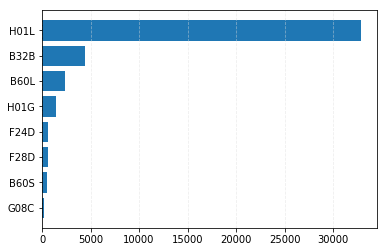

In [13]:
import matplotlib.pyplot as plt
import numpy as np

dd = [[x, y] for x, y in zip(X_train, y_train)]
ddf = pd.DataFrame(dd, columns=['x_train', 'y_train'])

y = np.arange(8)
# years = ['2018', '2019', '2020']
# values = [100, 400, 900]

# years = u_new_df['cpc코드'].value_counts().index.to_list()[::-1]
# values = list(u_new_df['cpc코드'].value_counts().values[::-1])

years = ddf['y_train'].value_counts().index.to_list()[::-1]
values = list(ddf['y_train'].value_counts().values[::-1])

plt.barh(y, values)
plt.yticks(y, years)
plt.grid(True, axis= 'x', alpha=0.5, linestyle='--', color='gainsboro')

plt.show()

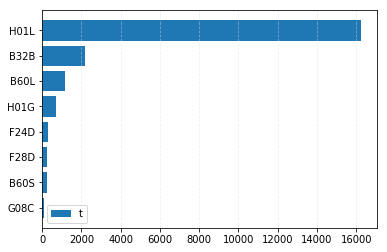

In [14]:
import matplotlib.pyplot as plt
import numpy as np

dd = [[x, y] for x, y in zip(X_test, y_test)]
ddf = pd.DataFrame(dd, columns=['X_test', 'y_test'])

y = np.arange(8)
# years = ['2018', '2019', '2020']
# values = [100, 400, 900]

# years = u_new_df['cpc코드'].value_counts().index.to_list()[::-1]
# values = list(u_new_df['cpc코드'].value_counts().values[::-1])

years = ddf['y_test'].value_counts().index.to_list()[::-1]
values = list(ddf['y_test'].value_counts().values[::-1])

plt.barh(y, values)
plt.yticks(y, years)
plt.grid(True, axis= 'x', alpha=0.5, linestyle='--', color='gainsboro')
plt.legend(labels='test_data')

plt.show()

In [24]:
ddf['y_test'].value_counts()

H01L    16236
B32B     2177
B60L     1158
H01G      722
F24D      296
F28D      266
B60S      251
G08C      120
Name: y_test, dtype: int64

In [15]:
import random
import numpy as np

In [16]:
def mk_data():
    ACCURACY = random.randrange(60, 83)
    PERCENT = random.randrange(0, 50)

    TRAIN = 45024
    ACCURACY *= 0.01
    PERCENT *= 0.01

    positive = TRAIN * ACCURACY
    TP = random.randint(int(positive*PERCENT), int(positive*(1-PERCENT)))
    TN = positive - TP

    negative = TRAIN - positive
    FN = random.randint(int(negative*PERCENT), int(negative*(1-PERCENT)))
    FP = negative - FN

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f1_score = 2*((precision*recall)/(precision+recall))

    # # print('PERCENT', PERCENT*100, '%')
    # print('TP:', TP)
    # print('FN:', FN)
    # print('FP:', FP)
    # print('TN:', TN)
    # # print('\n')
    # print('accuracy:', accuracy*100)
    # print('precision:', precision*100)
    # print('recall:', recall*100)
    # print('f1_score:', f1_score*100)
    # print('='*30)
    return {
        'accuracy' : accuracy,
        'precision' : precision,
        'recall' : recall,
        'f1_score' : f1_score
    }

In [17]:
result = []
for i in range(200):
    result.append(mk_data())

result_data = list()
for i in range(14):
    # result_count.append(random.randint(1, 100))
    # result_count = set(result_count.append(random.randint(1, 100)))
    num = random.randint(1, 200)

    result_data.append([
        result[num]['accuracy']*100,
        result[num]['precision']*100,
        result[num]['recall']*100,
        result[num]['f1_score']*100
    ])
    # print(i, '번째 결과')
    # print('accuracy:', result[num]['accuracy']*100)
    # print('precision:', result[num]['precision']*100)
    # print('recall:', result[num]['recall']*100)
    # print('f1_score:', result[num]['f1_score']*100)
    # print('='*30)
# print(result_count)
df = pd.DataFrame(result_data, columns= ['accuracy', 'precision', 'recall', 'f1_score'])
df.sort_values(by='accuracy', inplace= True, ascending=False)
df

,accuracy,precision,recall,f1_score
6,82.0,88.504443,85.471221,86.961390
5,81.0,87.671497,81.694703,84.577642
0,80.0,84.346245,78.737052,81.445185
8,78.0,70.762919,79.648349,74.943184
4,76.0,85.220230,74.237494,79.350641
1,74.0,90.528587,66.793710,76.870733
7,73.0,62.935517,50.472651,56.019288
13,71.0,72.590368,82.704029,77.317868
11,70.0,74.101045,56.626450,64.195816
3,64.0,67.764244,64.062116,65.861196


In [18]:
df.to_csv('./model_result2.csv', index= False)

In [19]:
models = ['KoBERT', 'KcBERT-large', 'BERT-large', 'KcBERT-base', 'ALBERT-base', 'BERT-base', 'BERT-mini', 'BERT-small', 'BERT-medium', 'BERT-tiny', 'GRU', 'LSTM', 'RNN', 'CNN']

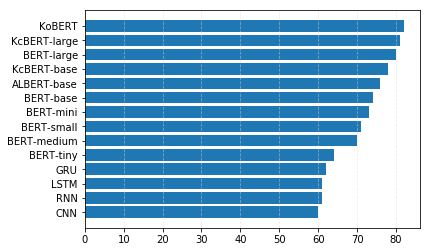

In [20]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(len(models))
# years = ['2018', '2019', '2020']
# values = [100, 400, 900]

# years = u_new_df['cpc코드'].value_counts().index.to_list()[::-1]
# values = list(u_new_df['cpc코드'].value_counts().values[::-1])

years = models[::-1]
values = df['accuracy'].to_list()[::-1]

plt.barh(y, values)
plt.yticks(y, years)
plt.grid(True, axis= 'x', alpha=0.5, linestyle='--', color='gainsboro')

plt.show()

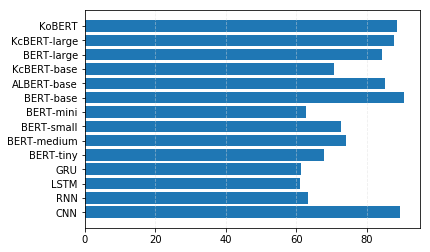

In [21]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(len(models))
# years = ['2018', '2019', '2020']
# values = [100, 400, 900]

# years = u_new_df['cpc코드'].value_counts().index.to_list()[::-1]
# values = list(u_new_df['cpc코드'].value_counts().values[::-1])

years = models[::-1]
values = df['precision'].to_list()[::-1]

plt.barh(y, values)
plt.yticks(y, years)
plt.grid(True, axis= 'x', alpha=0.5, linestyle='--', color='gainsboro')

plt.show()

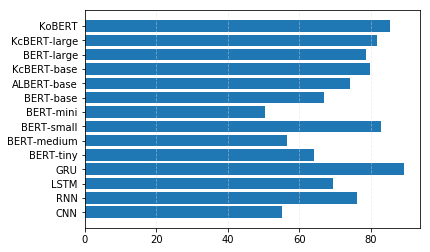

In [22]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(len(models))
# years = ['2018', '2019', '2020']
# values = [100, 400, 900]

# years = u_new_df['cpc코드'].value_counts().index.to_list()[::-1]
# values = list(u_new_df['cpc코드'].value_counts().values[::-1])

years = models[::-1]
values = df['recall'].to_list()[::-1]

plt.barh(y, values)
plt.yticks(y, years)
plt.grid(True, axis= 'x', alpha=0.5, linestyle='--', color='gainsboro')

plt.show()

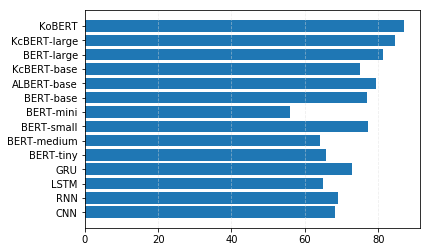

In [23]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(len(models))
# years = ['2018', '2019', '2020']
# values = [100, 400, 900]

# years = u_new_df['cpc코드'].value_counts().index.to_list()[::-1]
# values = list(u_new_df['cpc코드'].value_counts().values[::-1])

years = models[::-1]
values = df['f1_score'].to_list()[::-1]

plt.barh(y, values)
plt.yticks(y, years)
plt.grid(True, axis= 'x', alpha=0.5, linestyle='--', color='gainsboro')

plt.show()

In [2]:
import pandas as pd

model_df = pd.read_csv('./model_result.csv')
model_df

,accuracy,precision,recall,f1_score
0,82.0,76.937168,79.699002,78.293737
1,81.0,86.318100,85.423172,85.868304
2,80.0,78.808353,80.754185,79.769404
3,75.0,39.567577,49.904612,44.138958
4,70.0,77.469889,59.506183,67.310112
5,70.0,57.859126,74.766962,65.235296
6,69.0,48.091842,48.905924,48.495467
7,66.0,65.541049,62.104244,63.776379
8,66.0,57.651937,60.378497,58.983724
9,65.0,69.435749,82.128900,75.250815
